In [66]:
#Bring in dependancies
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import linregress
import scipy.stats as st


In [67]:
fashion_df = pd.read_csv("Resources/mock_fashion_data_uk_us.csv")

fashion_df

,Product Name,Price,Brand,Category,Description,Rating,Review Count,Style Attributes,Total Sizes,Available Sizes,Color,Purchase History,Age,Fashion Magazines,Fashion Influencers,Season,Time Period Highest Purchase,Customer Reviews,Social Media Comments,feedback
0,T5D3,97.509966,Ralph Lauren,Footwear,Bad,1.421706,492,Streetwear,"M, L, XL",XL,Green,Medium,24,Vogue,Chiara Ferragni,Fall/Winter,Daytime,Mixed,Mixed,Other
1,Y0V7,52.341277,Ted Baker,Tops,Not Good,1.037677,57,Vintage,"M, L, XL",XL,Black,Above Average,61,Glamour,Leandra Medine,Winter,Weekend,Negative,Neutral,Other
2,N9Q4,15.430975,Jigsaw,Footwear,Very Bad,3.967106,197,Streetwear,"S, M, L",M,Blue,Average,27,Marie Claire,Gigi Hadid,Summer,Nighttime,Unknown,Negative,Neutral
3,V2T6,81.116542,Alexander McQueen,Outerwear,Not Good,2.844659,473,Formal,"S, M, L",L,Red,Very High,50,Marie Claire,Chiara Ferragni,Fall/Winter,Weekend,Neutral,Other,Other
4,S7Y1,31.633686,Tommy Hilfiger,Bottoms,Very Good,1.183242,55,Sporty,"M, L, XL",S,Green,Above Average,23,Glamour,Song of Style,Spring,Daytime,Positive,Mixed,Positive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,K9C7,16.255998,Mulberry,Accessories,Best,3.534252,312,Vintage,"S, L, XL",XL,Green,Very High,37,Cosmopolitan,Olivia Palermo,Winter,Holiday,Positive,Negative,Positive
999996,E5I5,78.555545,Mulberry,Activewear,Best,1.896160,68,Casual,"S, M, L",L,Red,Average,52,Glamour,Kendall Jenner,Spring,Evening,Unknown,Other,Neutral
999997,Y0C9,34.379639,Mulberry,Tops,Not Good,3.168064,237,Casual,"S, M, L",M,Red,High,25,Cosmopolitan,Leandra Medine,Summer,Evening,Neutral,Mixed,Unknown
999998,B1D8,62.343618,Ralph Lauren,Tops,Best,4.764673,53,Sporty,"M, L, XL",S,Red,Above Average,29,W,Olivia Palermo,Spring/Summer,Evening,Positive,Other,Other


In [68]:
fashion_df.groupby("Fashion Influencers")["Brand"].value_counts()

Fashion Influencers  Brand            
Aimee Song           Ralph Lauren         12661
                     Tommy Hilfiger       12591
                     Burberry             12499
                     Alexander McQueen    12448
                     Ted Baker            12438
                                          ...  
Song of Style        Tommy Hilfiger       12427
                     Jigsaw               12414
                     Mulberry             12413
                     Ted Baker            12410
                     Alexander McQueen    12377
Name: Brand, Length: 80, dtype: int64

In [69]:
# get the colour, brand and price from fashion df
d_analysis1 = fashion_df[['Price','Brand', 'Color', 'Age']]
d_analysis1

,Price,Brand,Color,Age
0,97.509966,Ralph Lauren,Green,24
1,52.341277,Ted Baker,Black,61
2,15.430975,Jigsaw,Blue,27
3,81.116542,Alexander McQueen,Red,50
4,31.633686,Tommy Hilfiger,Green,23
...,...,...,...,...
999995,16.255998,Mulberry,Green,37
999996,78.555545,Mulberry,Red,52
999997,34.379639,Mulberry,Red,25
999998,62.343618,Ralph Lauren,Red,29


In [70]:
# get the number of colors per brand grouped by color
colors_df = d_analysis1.groupby("Color")['Brand'].value_counts()
colors_df

Color  Brand            
Black  Calvin Klein         31528
       Ralph Lauren         31488
       Jigsaw               31338
       Ted Baker            31268
       Burberry             31244
       Alexander McQueen    31063
       Mulberry             31061
       Tommy Hilfiger       30955
Blue   Ralph Lauren         31529
       Tommy Hilfiger       31527
       Alexander McQueen    31398
       Jigsaw               31331
       Burberry             31322
       Calvin Klein         31264
       Mulberry             31157
       Ted Baker            30970
Green  Tommy Hilfiger       31509
       Ralph Lauren         31407
       Alexander McQueen    31356
       Ted Baker            31286
       Burberry             31273
       Jigsaw               31228
       Mulberry             31197
       Calvin Klein         30635
Red    Jigsaw               31410
       Alexander McQueen    31310
       Tommy Hilfiger       31284
       Calvin Klein         31283
       Mulberry        

<Axes: xlabel='Brand'>

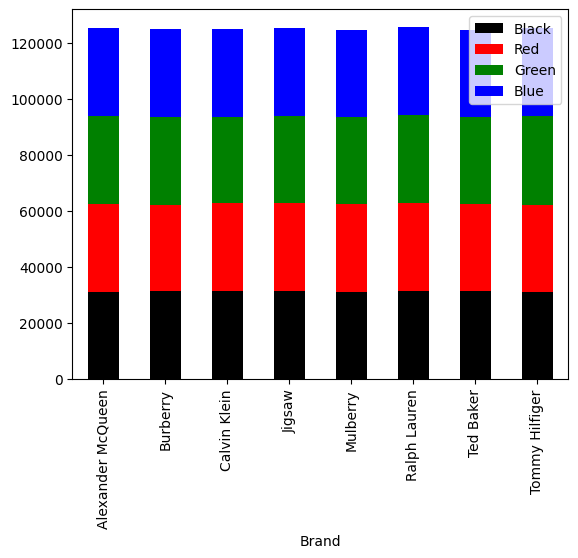

In [71]:
#Add each color to a dictionary
colorful_clothing = pd.DataFrame({"Black": colors_df["Black"], "Red":colors_df["Red"], "Green":colors_df["Green"], "Blue": colors_df["Blue"]})
color= ["Black", "Red", "Green", "Blue"]
colorful_clothing.plot(kind='bar', stacked=True, color=color)

In [72]:
fashion_df.groupby("Brand")['Rating'].agg({'mean','median','var','std','sem'})

,mean,sem,var,median,std
Brand,,,,,
Alexander McQueen,2.997839,0.003268,1.336503,2.998011,1.156072
Burberry,2.996150,0.003270,1.334237,2.991826,1.155092
Calvin Klein,3.001044,0.003268,1.332203,2.998955,1.154211
Jigsaw,2.995833,0.003261,1.332754,2.991760,1.154450
Mulberry,2.996242,0.003274,1.336615,2.991634,1.156121
Ralph Lauren,3.001783,0.003258,1.332862,2.997039,1.154496
Ted Baker,3.004080,0.003268,1.329723,3.005923,1.153136
Tommy Hilfiger,2.994681,0.003260,1.331676,2.994725,1.153983


In [73]:
# find the outliers for number of ratings
brand = ["Alexander McQueen", "Burberry", "Calvin Klein", "Jigsaw", "Mulberry", "Ralph Lauren", "Ted Baker", "Tommy Hilfiger"]
brand_rating = []
# quartiles
for br in brand:
    # Locate the rows that contain the brand
    brand_rate = fashion_df.loc[fashion_df["Brand"]==br, "Rating"]
    # add subset 
    brand_rating.append([brand_rate])
#     Determine outliers using upper and lower bounds
    quartiles = brand_rate.quantile([.25,.5,.75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq-lowerq
    lowerbound = lowerq - (1.5*iqr)
    upperbound = upperq + (1.5*iqr)
    print(f"{br}'s potential outliers: Lowerbound: {lowerbound}, UpperBound: {upperbound}")

Alexander McQueen's potential outliers: Lowerbound: -0.9997776321353484, UpperBound: 6.996582876839907
Burberry's potential outliers: Lowerbound: -1.007153382182792, UpperBound: 6.99996854588066
Calvin Klein's potential outliers: Lowerbound: -0.9917266256972037, UpperBound: 6.996292158950727
Jigsaw's potential outliers: Lowerbound: -0.9992663032718805, UpperBound: 6.987176953343147
Mulberry's potential outliers: Lowerbound: -1.0139701764565672, UpperBound: 7.001995265753376
Ralph Lauren's potential outliers: Lowerbound: -0.9981935180931094, UpperBound: 7.007393658479757
Ted Baker's potential outliers: Lowerbound: -0.9958790023712116, UpperBound: 7.0058356473915655
Tommy Hilfiger's potential outliers: Lowerbound: -1.0064792688005286, UpperBound: 6.9938085252871165


In [74]:
mcqueen = fashion_df.loc[fashion_df["Brand"]=="Alexander McQueen's"]
burberry = fashion_df.loc[fashion_df["Brand"]=="Burberry"]
klein = fashion_df.loc[fashion_df["Brand"]=="Calvin Klein"]
jigsaw = fashion_df.loc[fashion_df["Brand"]=="Jigsaw"]
mulberry = fashion_df.loc[fashion_df["Brand"]=="Mulberry"]
ralph = fashion_df.loc[fashion_df["Brand"]=="Ralph Lauren"]
baker = fashion_df.loc[fashion_df["Brand"]=="Ted Baker"]
hilfiger = fashion_df.loc[fashion_df["Brand"]=="Tommy Hilfiger"]

fashion_df["Price"].min()

10.000144517354114

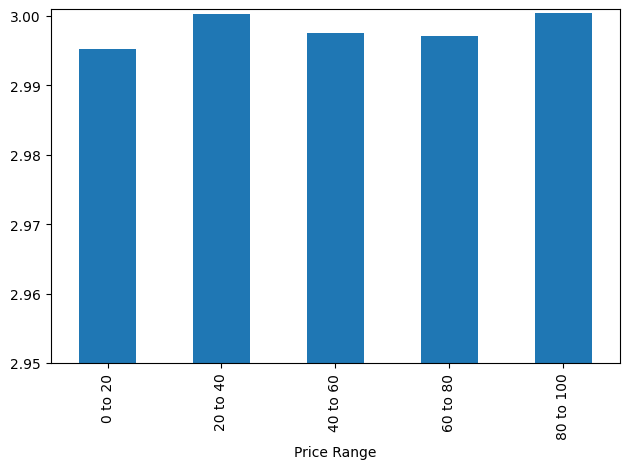

In [87]:
price_bins = [0, 20, 40, 60, 80, 100]
label = ["0 to 20", "20 to 40", "40 to 60", "60 to 80", "80 to 100"]
fashion_df["Price Range"] = pd.cut(fashion_df["Price"], price_bins, labels=label, include_lowest=True)
rating_ave = fashion_df.groupby("Price Range")["Rating"].mean()
rating_ave
fig = rating_ave.plot(kind='bar', x="Price Range", y= "Rating", ylim=(2.95,3.001)).get_figure()
plt.tight_layout()ss

In [88]:
fig.savefig("Ratings.png")